In [ ]:
!gdown --id 1Eqc-nrTMBd70E0s55xKFfABsIS2OnePU

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Eqc-nrTMBd70E0s55xKFfABsIS2OnePU
From (redirected): https://drive.google.com/uc?id=1Eqc-nrTMBd70E0s55xKFfABsIS2OnePU&confirm=t&uuid=d9d39da6-ae5b-49e6-b7ec-740a78a88d43
To: /content/train.zip
100% 295M/295M [00:04<00:00, 65.4MB/s]


In [ ]:
!unzip '/content/train.zip'

Archive:  /content/train.zip
  inflating: train/Ghe, nhiem trung/Ghe_72_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_5_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_76_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_60_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_92_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_60_aug_2.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_91_aug_2.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_69_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_87_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_77_aug_2.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_80_aug_2.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_66_aug_2.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_78_aug_1.jpg  
  inflating: train/Me day/MeDay_63_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_47_aug_2.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_93_aug_2.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_70_aug_1.jpg  
  inflating: train/Ghe, nhiem trung/Ghe_6_aug

In [ ]:
import os

path='/content/train'
classes=os.listdir(path)
print(classes)

['Lupus, cac benh mo', 'Nam da', 'Zona', 'Ghe, nhiem trung', 'Me day', 'Vay nen', 'HPV, benh lay qua duong tinh duc']


In [ ]:
import os
import numpy as np
import torch
import torch.optim as optim

import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torchvision.transforms import Resize

if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')

In [ ]:
classes=os.listdir(path)
print(classes)
n_classes=len(classes)
print(n_classes)

['Lupus, cac benh mo', 'Nam da', 'Zona', 'Ghe, nhiem trung', 'Me day', 'Vay nen', 'HPV, benh lay qua duong tinh duc']
7


In [ ]:
cls2idx={classes[i]:i for i in range(n_classes)}
idx2cls={i:classes[i] for i in range(n_classes)}
print(cls2idx)
print(idx2cls)

{'Lupus, cac benh mo': 0, 'Nam da': 1, 'Zona': 2, 'Ghe, nhiem trung': 3, 'Me day': 4, 'Vay nen': 5, 'HPV, benh lay qua duong tinh duc': 6}
{0: 'Lupus, cac benh mo', 1: 'Nam da', 2: 'Zona', 3: 'Ghe, nhiem trung', 4: 'Me day', 5: 'Vay nen', 6: 'HPV, benh lay qua duong tinh duc'}


In [ ]:
class ImageDataset(Dataset):
  def __init__(self,root_dir, cls2idx,transform, norm=None):
    self.root_dir=root_dir
    self.norm=norm
    self.cls2idx=cls2idx
    self.transform=transform # Store the transform
    self.paths, self.labels = self.read_img()

  def read_img(self):
    paths=[]
    labels=[]

    for cls in cls2idx.keys():
      cls_path=os.path.join(self.root_dir,cls)
      for img in os.listdir(cls_path):
        img_path=os.path.join(cls_path,img)
        paths.append(img_path)
        labels.append(cls2idx[cls])
    return paths, labels

  def __len__(self):
    return len(self.paths)

  def __getitem__(self,idx):
    img_path=self.paths[idx]
    label=self.labels[idx]

    img=read_image(img_path)
    img=self.transform(img) # Apply transform here
    img=img.type(torch.float32)

    if img.shape[0]==1:
      img=img.repeat(3,1,1)
    elif img.shape[0]==4:
      img=img[:3]
    if self.norm:
      img/=255
    return img, label

In [ ]:
train_dir=path

transforms_img=transforms.Compose([
    Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(5),
    transforms.RandomErasing(p=0.75,
                             scale=(0.01, 0.3),
                             ratio=(1.0, 1.0),
                             value=0,
                             inplace =True)
])

train_set=ImageDataset(train_dir,cls2idx,transforms_img, norm=True)

print(len(train_set))


2791


In [ ]:
train_loader=DataLoader(train_set,batch_size=32,shuffle=True)

In [ ]:
for x, y in train_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([32, 3, 224, 224])
torch.Size([32])


In [ ]:
from collections import Counter

counts = Counter(train_set.labels)   # đếm theo index class
for idx, cnt in counts.items():
    print(f"{idx2cls[idx]}: {cnt}")

Lupus, cac benh mo: 306
Nam da: 323
Zona: 516
Ghe, nhiem trung: 369
Me day: 596
Vay nen: 316
HPV, benh lay qua duong tinh duc: 365


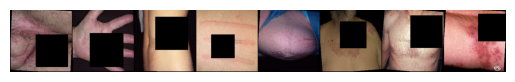

In [ ]:
from torchvision.utils import make_grid

def show_img(img):
  img=img.numpy()
  img=img.transpose((1,2,0))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

for img, label in train_loader:
  show_img(make_grid(img[0:8]))
  break

In [ ]:
import timm

# EfficientNetV2-S (Small) là lựa chọn cân bằng nhất
model = timm.create_model(
    'tf_efficientnetv2_s.in21k_ft_in1k', # <-- SỬA LẠI TÊN MODEL Ở ĐÂY
    pretrained=True,
    num_classes=7 # Số lượng bệnh da liễu bạn cần phân loại
)

print("✅ Model đã được tải thành công!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

✅ Model đã được tải thành công!


In [ ]:
model=model.to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=1e-3)
decayRate = 0.96
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decayRate)

In [ ]:
epoch_max=40

losses_train=[]
accuracy_train=[]

losses_val=[]
accuracy_val=[]

for epoch in range(epoch_max):
  total_train=0
  loss_train=0
  loss_val=0

  correct_train=0
  print('epoch = [', epoch+1 , '/',epoch_max,']')
  for img, label in train_loader:
    model.train()

    img, label= img.to(device), label.to(device)

    predict=model(img)

    optimizer.zero_grad()
    loss=criterion(predict, label)
    loss.backward()
    optimizer.step()

    # Calculate correct predictions
    _, predicted_classes = torch.max(predict, 1) # Get the index of the max log-probability
    correct_train += (predicted_classes == label).sum().item()

    loss_train+=loss.item()
    total_train+=label.size(0)


  loss_epoch=loss_train/len(train_loader)
  losses_train.append(loss_epoch)

  acc_epoch_train = correct_train / total_train
  # There was a typo here, changed 'correct' to 'correct_train'
  accuracy_train.append(acc_epoch_train)


  print('--- loss_train = ', loss_epoch, '--- accuracy train = ', acc_epoch_train)

epoch = [ 1 / 40 ]
--- loss_train =  1.685661975971677 --- accuracy train =  0.5542816194912218
epoch = [ 2 / 40 ]
--- loss_train =  0.6514209722253409 --- accuracy train =  0.7689000358294518
epoch = [ 3 / 40 ]
--- loss_train =  0.47439915212717926 --- accuracy train =  0.8355428161949122
epoch = [ 4 / 40 ]
--- loss_train =  0.3660322975536639 --- accuracy train =  0.8778215693299892
epoch = [ 5 / 40 ]
--- loss_train =  0.34040162178941746 --- accuracy train =  0.8874955213185238
epoch = [ 6 / 40 ]
--- loss_train =  0.21462679683992808 --- accuracy train =  0.9240415621640989
epoch = [ 7 / 40 ]
--- loss_train =  0.22593158144842496 --- accuracy train =  0.932282336080258
epoch = [ 8 / 40 ]
--- loss_train =  0.31529823601753876 --- accuracy train =  0.889645288427087
epoch = [ 9 / 40 ]
--- loss_train =  0.22295801783911884 --- accuracy train =  0.9258330347545682
epoch = [ 10 / 40 ]
--- loss_train =  0.185305800056085 --- accuracy train =  0.9394482264421354
epoch = [ 11 / 40 ]
--- los

In [ ]:
from PIL import Image
from torchvision.transforms import ToTensor

test_path='/content/Ảnh market bệnh viện Nam Thăng Long(8).png'

img=Image.open(test_path).convert('RGB')
img=img.resize((224,224))
img = ToTensor()(img) # Convert PIL Image to Tensor
img=transforms_img(img)
img=img.unsqueeze(0)
test=img.to(device)

model.eval()
with torch.no_grad():
  pred=model(test)
  pred=torch.argmax(pred, dim=1)
  print(idx2cls[pred.item()])

Nam da


In [ ]:
torch.save(model.state_dict(), "weight.pth")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful